# Importing Necessary Libraries

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import os, random
from ultralytics import YOLO
import cv2

#Extracting Zip File

In [ ]:
file=zipfile.ZipFile("/content/archive.zip")
file.extractall()

#Loading Pre-Trained model

In [ ]:
model=YOLO("yolo11n.pt")

#Training Model On Custom Images

In [ ]:
model.train(data="/content/BoneFractureYolo8/data.yaml",epochs=60,imgsz=640)

Ultralytics 8.3.210 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9639474320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

#Metrics Evaluation

In [ ]:
metrics = model.val(data="/content/bone fracture detection.v4-v4.yolov8/data.yaml")

Ultralytics 8.3.210 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 317.1±122.5 MB/s, size: 8.9 KB)
val: Scanning /content/bone fracture detection.v4-v4.yolov8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 2.7Kit/s 0.1s
val: New cache created: /content/bone fracture detection.v4-v4.yolov8/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 5.4it/s 4.1s
                   all        348        204      0.391      0.299      0.256      0.097
        elbow positive         28         29      0.118      0.103     0.0315     0.0112
      fingers positive         41         48      0.343      0.271      0.203     0.0593
      forearm fracture         37         43      0.553      0.419      0.451      0.173
               humerus         31         36      0.816      0.556       0.62      0.253
     shoulder frac

# Save Model

In [ ]:
model.save("bone_fracture_detection.pt")

# Predictions On Testing Data

In [ ]:

def predict_test_images(test_path, model_path, k=5):
    model = YOLO(model_path)

    images = [os.path.join(test_path, f) for f in os.listdir(test_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not images:
        print(" No images found in test folder!")
        return []   # return empty list instead of None

    selected = random.sample(images, min(k, len(images)))

    all_results = []
    for img in selected:
        results = model.predict(img, save=True)
        all_results.extend(results)

        # Optional: show prediction
        annotated_image = results[0].plot()
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.show()

    return all_results



image 1/1 /content/bone fracture detection.v4-v4.yolov8/test/images/image1_137_png.rf.996f3c880689913494b8c7baae7a6f0d.jpg: 608x640 (no detections), 10.8ms
Speed: 4.8ms preprocess, 10.8ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 640)
Results saved to /content/runs/detect/predict7


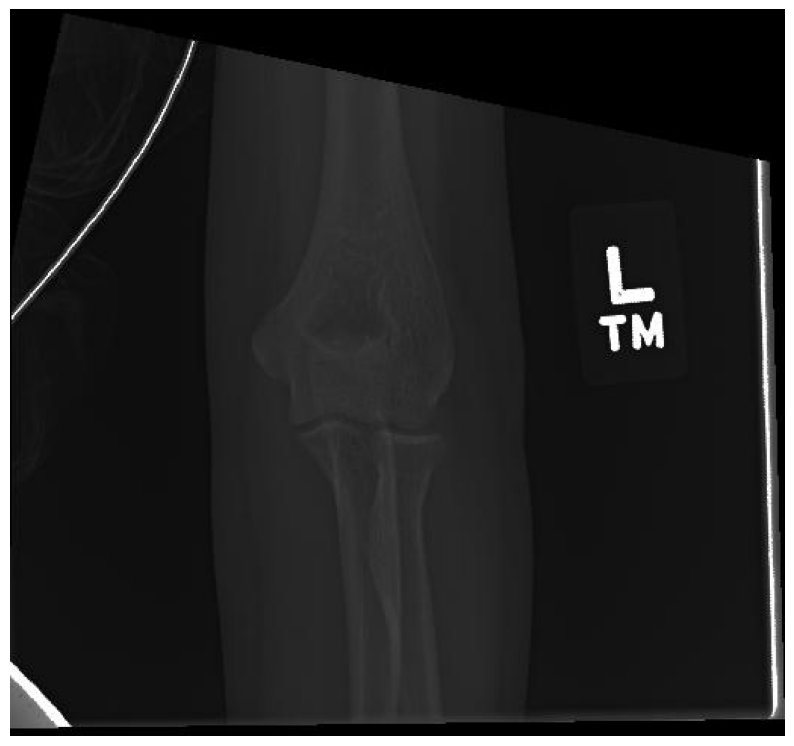


image 1/1 /content/bone fracture detection.v4-v4.yolov8/test/images/image1_258_png.rf.7d64b6239897f6838c97b4d18d6ed0c9.jpg: 640x352 (no detections), 22.4ms
Speed: 2.4ms preprocess, 22.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 352)
Results saved to /content/runs/detect/predict7


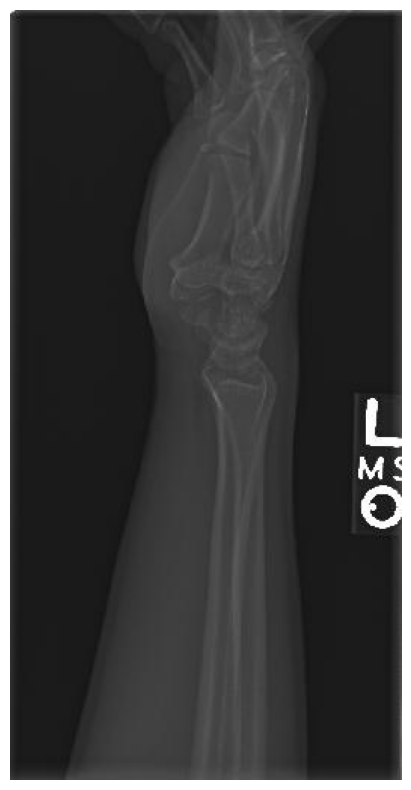


image 1/1 /content/bone fracture detection.v4-v4.yolov8/test/images/image1_1035_png.rf.d7493a5653bc3628f7a1b1ec0eb5de85.jpg: 640x544 1 humerus, 15.8ms
Speed: 5.6ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict7


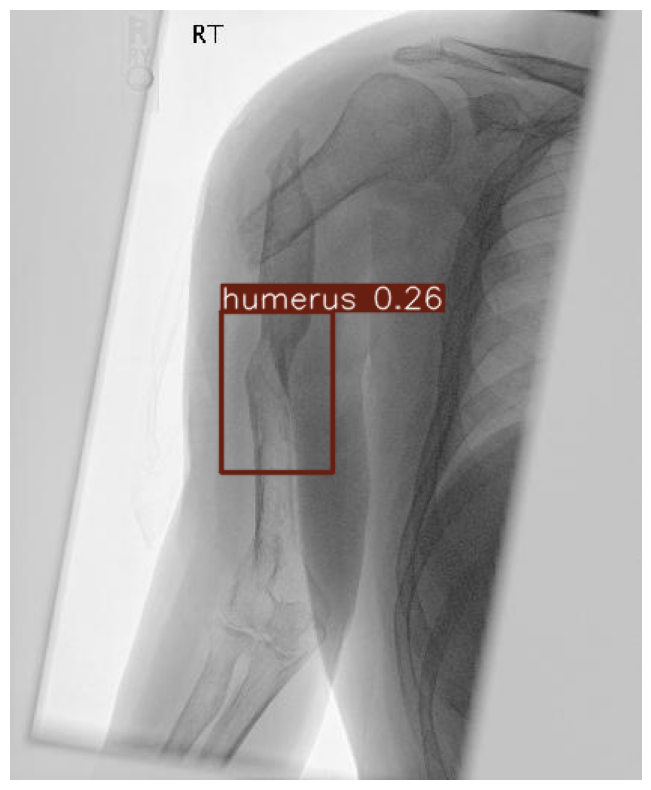

Class: humerus, Confidence: 0.26, BBox: [140.8, 200.7, 214.7, 307.1]
✅ Predictions saved to predictions.csv


In [ ]:

results = predict_test_images(
    "/content/bone fracture detection.v4-v4.yolov8/test/images",
    "/content/bone_fracture_detection.pt",
    k=3
)

model = YOLO("/content/bone_fracture_detection.pt")  # to get class names

records = []  # <-- collect all predictions here

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        conf = float(box.conf[0])

        print(f"Class: {cls_name}, Confidence: {conf:.2f}, "
              f"BBox: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")

        # add record for saving
        records.append([r.path, cls_name, conf, x1, y1, x2, y2])

# save to CSV
df = pd.DataFrame(records, columns=["image", "class", "confidence", "x1", "y1", "x2", "y2"])
df.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")
